In [121]:
import numpy as np
import matplotlib.pyplot as plt

def game(strategies):
    
    board = np.zeros((4,4), dtype = int) - 1
    win = 0
    
    while win != 1:
        for i in range(0,4):
            board = play(i, board, strategies[i,:])
            #print(board)
            if sum(board[i,:]) == 118:
                win = 1
                return i

In [122]:
def unfair_dice(previous_dice):
    r = np.random.uniform(0,1)
    new_dice = 0
    
    if previous_dice == 1:
        w1 = [1/13, 3/13, 5/13, 7/13, 9/13, 13/13]
        
        for i in range(6):
            if r < w1[i]:
                new_dice = i + 1
                break
                
    elif previous_dice == 2:
        w2 = [2/13, 3/13, 5/13, 7/13, 11/13, 13/13]
            
        for i in range(6):
            if r < w2[i]:
                new_dice = i + 1
                break
                
    elif previous_dice == 3:
        w3 = [2/13, 4/13, 5/13, 9/13, 11/13, 13/13]
        
        for i in range(6):
            if r < w3[i]:
                new_dice = i + 1
                break
                
    elif previous_dice == 4:
        w4 = [2/13, 4/13, 8/13, 9/13, 11/13, 13/13]
        
        for i in range(6):
            if r < w4[i]:
                new_dice = i + 1
                break
                
    elif previous_dice == 5:
        w5 = [2/13, 6/13, 8/13, 10/13, 11/13, 13/13]
        
        for i in range(6):
            if r < w5[i]:
                new_dice = i + 1
                break
    else:
        w6 = [4/13, 6/13, 8/13, 10/13, 12/13, 13/13]
        
        for i in range(6):
            if r < w6[i]:
                new_dice = i + 1
                break
                
    return new_dice

In [123]:
#dices = []

#for i in range(500000):
#    dices.append(unfair_dice(6))
    
#plt.hist(dices)

In [124]:
def play(player, board, strategy):
    transformBoard(player, board)
    dice = np.random.randint(1,7)
    moves = playableMoves(board, dice, player)
    
    if np.sum(moves) == 0:
        reverseBoard(player, board)
        return board
    
    util = utility(board, moves, dice, player)
    score = list(np.dot(strategy, util))
    move = score.index(max(score))
    
    newBoard(board, move, dice, player)
    reverseBoard(player, board)
    
    if dice == 6:
        play(player, board, strategy)
    
    return board

In [125]:
def newBoard(board, move, dice, player):
    if board[player, move] == -1:
        board[player, move] = 0
    else:
        board[player, move] += dice
    
    for i in range(0,4):
        for j in range(0, 4):
            if i != player:
                if board[i,j] == board[player, move] and board[i,j] < 28: 
                    #print("lors")
                    board[i,j] = -1

In [126]:
def reverseBoard(player, board):
    oldBoard = np.array(board)
    for i in range(0,3):
        board[(player + i + 1) % 4,:] = (board[(player + i + 1) % 4,:] - 7 * (i+1)) % 28  
    for i in range(0,4):
        for j in range(0,4):
            if(oldBoard[i,j] == -1 or oldBoard[i,j] > 27):
                board[i,j] = oldBoard[i,j]

In [127]:
def transformBoard(player, board):
    oldBoard = np.array(board)
    for i in range(0,3):
        board[(player + i + 1) % 4,:] = (board[(player + i + 1) % 4,:] + 7 * (i+1)) % 28  
    for i in range(0,4):
        for j in range(0,4):
            if(oldBoard[i,j] == -1 or oldBoard[i,j] > 27):
                board[i,j] = oldBoard[i,j]

In [128]:
def playableMoves(board, dice, player):
    moves = np.array([0,0,0,0])
    for i in range(0, 4):
        if len(np.where(board[player,:] == board[player,i] + dice)[0]) == 0 and board[player, i] + dice < 32 and board[player, i] != -1:
            moves[i] = 1
        else:
            moves[i] = 0
        if dice == 6 and len(np.where(board[player,:] == 0)[0]) == 0 and board[player, i] == -1:
            moves[i] = 1
        
    return moves

In [129]:
def utility(board, moves, dice, player):
    utils = np.zeros((10,4), dtype = float)
    
    utils[0,:] = lead(board, moves, dice, player)
    utils[1,:] = new(board, moves, dice, player)
    utils[2,:] = eat(board, moves, dice, player)
    utils[3,:] = goal(board, moves, dice, player)
    utils[4,:] = last(board, moves, dice, player)
    utils[5,:] = eaters(board, moves, dice, player)
    utils[6,:] = eatables(board, moves, dice, player)
    return utils

In [130]:
def lead(board, moves, dice, player):
    
    max = -2
    max_i = -1
    for i in range(0, 4):
        if moves[i] == 1 and board[player, i] > max and board[player, i] < 28:
            max = board[player, i]
            max_i = i
    
    if max_i < 0:
        return moves
    else:
        result = np.array([0,0,0,0])   
        result[max_i] = 1
        return result

In [131]:
def new(board, moves, dice, player):
    
    max = -2
    max_i = -1
    for i in range(0, 4):
        if moves[i] == 1 and board[player, i] == -1:
            max = board[player, i]
            max_i = i
            break
    
    if max_i < 0:
        return moves
    else:
        result = np.array([0,0,0,0])   
        result[max_i] = 1
        return result

In [132]:
def eat(board, moves, dice, player):
    
    result = np.array([0,0,0,0])
    for m in range(0,4):
        if moves[m] == 1:
            for i in range(0, 4):
                for j in range(0, 4):
                    if (board[player, m] + dice == board[i,j] and board[i,j] < 28 and board[player, m] != -1) or (board[i,j] == 0 and board[player, m] == -1):
                        result[m] = 1
                
    if sum(result) == 0:
        return moves
    else:
        return result

In [133]:
def goal(board, moves, dice, player):
    
    result = np.array([0,0,0,0])
    
    for m in range(0,4):
        if moves[m] == 1 and dice + board[player, m] > 27:
            result[m] = 1
    
    if sum(result) == 0:
        return moves
    else:
        return result

In [134]:
def last(board, moves, dice, player):
    
    min = 32
    min_i = -1
    for i in range(0, 4):
        if moves[i] == 1 and board[player, i] < min and board[player, i] > -1:
            min = board[player, i]
            min_i = i
    
    if min_i < 0:
        return moves
    else:
        result = np.array([0,0,0,0])   
        result[min_i] = 1
        return result

In [135]:
def can_be_eaten(board, place, dice, player):
    if dice == 6 and board[player, place] == -1:
        location = 0
    else:
        location = board[player, place] + dice
    
    if location > 27:
        return 0
    
    eaters = 0
    
    abs_board = np.array(board)
    reverseBoard(player, abs_board)
    for i in range(0, 4):
        if i != player:
            for j in range(0,4):
                difference = location - board[i,j]
                if board[i,j] < 28 and board[i,j] != -1 and difference <= 6 and difference > 0 and abs_board[i,j] + difference < 28:  
                    eaters += 1
    
    return eaters

In [136]:
def eaters(board, moves, dice, player):
    result = np.array([0, 0, 0, 0])
    for m in range(0,4):
        if moves[m] == 1:
            result[m] = can_be_eaten(board, m, 0, player) - can_be_eaten(board, m, dice, player)
    
    if sum(result) == 0:
        return moves
    else:
        return result

In [137]:
def can_eat(board, place, dice, player):
    
    if dice == 6 and board[player, place] == -1:
        location = 0
    else:
        location = board[player, place] + dice
    
    if location > 27:
        return 0
    
    can_eat = 0
    
    for i in range(0, 4):
        if i != player:
            for j in range(0,4):
                difference = board[i,j] - location
                if board[i,j] < 28 and board[i,j] != -1 and difference <= 6 and difference > 0:  
                    can_eat += 1
    
    return can_eat

In [138]:
def eatables(board, moves, dice, player):
    result = np.array([0, 0, 0, 0])
    for m in range(0,4):
        if moves[m] == 1:
            result[m] = can_eat(board, m, dice, player) - can_eat(board, m, 0, player)
    
    if sum(result) == 0:
        return moves
    else:
        return result

In [139]:
#lead
#new
#eat
#goal
#last
karki_liikkuu = np.array([100, 20, 30, 50, 0, 20, 10, 0, 0, 0])
juna_liikkuu  = np.array([0, 120, 30, 0, 100, 50, 10, 0, 0, 0])
full_destruction = np.array([0, 400, 500, 0, 0, 0, 200, 0, 0, 0])
smart = np.array([70, 10, 100, 200, 50, 20, 30, 0, 0, 0])

In [140]:
strategies = np.zeros((4,10))
strategies[0,:] = karki_liikkuu
strategies[1,:] = juna_liikkuu
strategies[2,:] = full_destruction
strategies[3,:] = smart

In [141]:
wins = []
for i in range(0,500):
    if i % 10 == 0:
        print(i)
    wins.append(game(strategies))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


(array([ 137.,    0.,    0.,   60.,    0.,    0.,  167.,    0.,    0.,  136.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

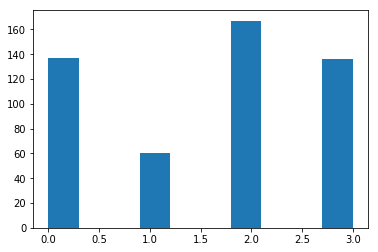

In [142]:
plt.hist(wins)